In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


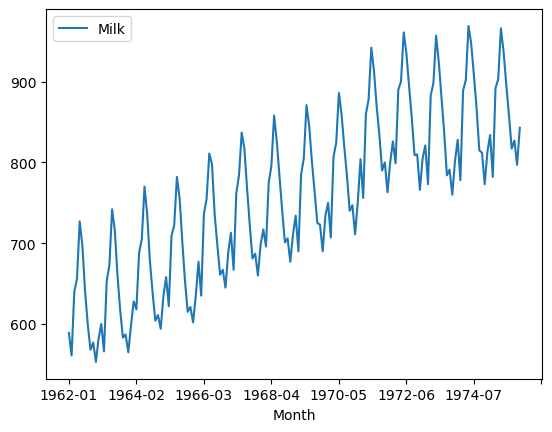

In [9]:
df.plot(x='Month', y='Milk')
plt.show()

In [10]:
y = df['Milk']

Centered Moving Average(MA)

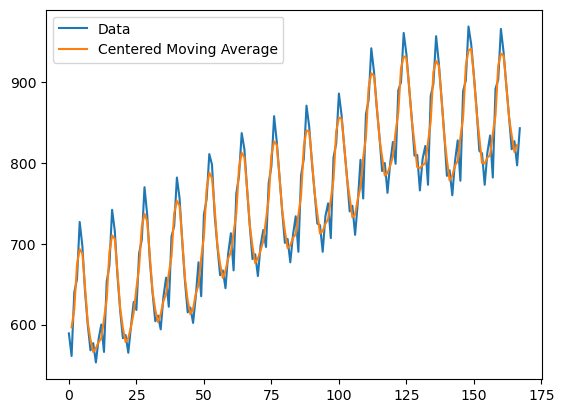

In [18]:
fcast = y.rolling(3, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label= 'Centered Moving Average')
plt.legend(loc='best')
plt.show()

In [22]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
span = 3

Trailling Moving Average(MA)

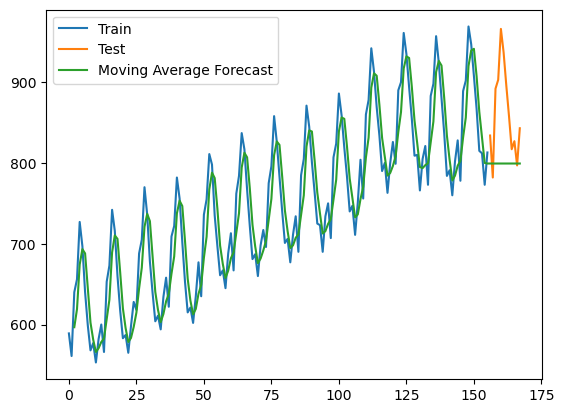

In [26]:
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label= 'Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [27]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error


rms = sqrt(mean_squared_error(y_test, MA_series))
print(rms)

83.33766655400582
